Airbnb has become an extremely popular platform for connecting travelers with housing rentals across the world. Its users can search its extensive database of rentals, in the hopes of finding a suitable match for their travels. Let's explore a data set of Airbnb rentals in Asheville, North Carolina, the destination of Prof. Barnes's recent Spring Break getaway. The data was collected on February 17, 2019 (courtesy of Inside Airbnb) and contains the following relevant information about the rentals:

    -Unique identifiers for the rental (id) and the host (host_id)
    -Name for the rental (name) and host (host_name)
    -Location information (neighborhood - ZIP code, latitude/longitude)
    -Room type
    -Average nightly price (in dollars)
    -Minimum nights per stay
    -Number of reviews for the rental
    -Date of most recent review
    -Number of reviews per month
    -Number of listings by the host in the last month
    -Number of available days for rental over the next year (availability_365)
Complete the following exercises using the provided data:

a. Perform an analysis of missingness in the data (i.e., what is the extent of missing values in the data and where do they occur?). Based on what you observe, perform an appropriate set of processing operations (if applicable) to manage the data appropriately. Please make sure to justify any processing steps (or lack of steps) that you perform.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'F:/MS in Business Analytics/Spring/Python/Data Files/'
df = pd.read_csv(path + 'airbnb_asheville_listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian twin BR for 2,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,45,1,121,2018-11-25,1.20,1,60
1,80905,French Industrial Chic Loft,427027,AshevilleStay,NaN,28801,35.59701,-82.55237,Entire home/apt,765,1,92,2018-12-02,1.01,12,361
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,2,85,2018-12-25,0.94,2,9
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,195,2019-02-10,2.12,7,339
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,51,2019-01-11,0.56,7,349


In [3]:
df.shape

(2053, 16)

In [4]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2053
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        199
reviews_per_month                  199
calculated_host_listings_count       0
availability_365                     0
dtype: int64

** We can see that negibhourhood_group has all the rows missing, hence we can delete that column**

In [5]:
del df['neighbourhood_group']

In [6]:
df.shape

(2053, 15)

In [7]:
df[df['last_review'].isnull() & df['reviews_per_month'].isnull()].shape

(199, 15)

In [8]:
df['number_of_reviews'][df['last_review'].isnull() & df['reviews_per_month'].isnull()].unique()

array([0], dtype=int64)

**We can see that last_review and reviews_per_month are missing when number_of_reviews is 0, hence it makes perfect sense to leave those missing values like that**

b. Analyze and describe the distribution of average nightly price in the data set.



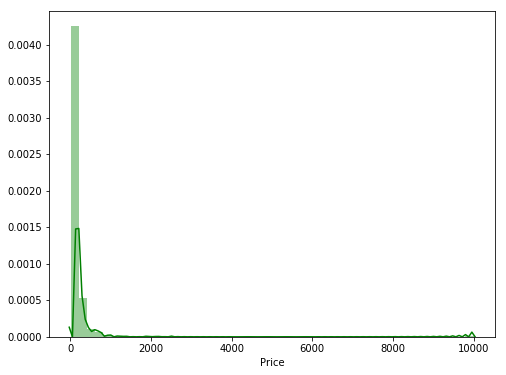

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'], kde=True, hist=True, color='green')
plt.xlabel('Price')
plt.ylabel('');

**As we can see for the majority of the rooms the price per night is under $500 or so. But there are few outliers that have very high prices**

c. The room type is one of the most important characteristics of the rental, and has a significant impact on the average nightly price. Analyze the relationship between the room type and average nightly price, and describe your results.

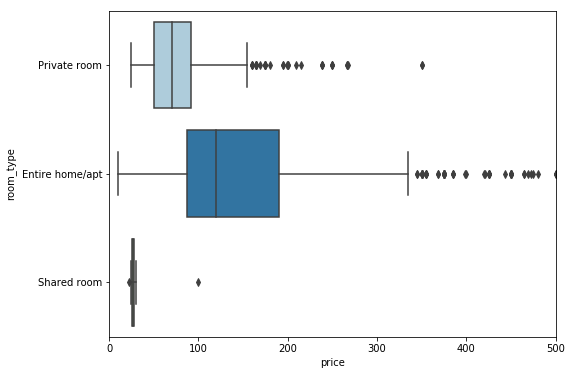

In [24]:
plt.figure(figsize(8,6))
sns.boxplot(x='price', y='room_type', data=df, palette='Paired')
plt.xlim([0,500]);

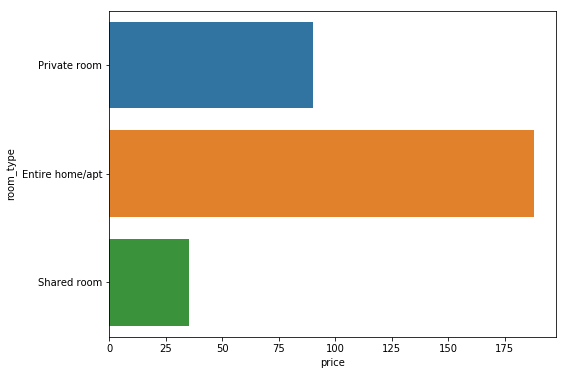

In [9]:
plt.figure(figsize(8,6))
sns.barplot(x='price', y='room_type', data=df, ci=None, estimator=np.mean);

**As we can see, the average price is the highest for the Entire home/apt, followed by Private room and Shared room respectively**

**The same trend follows for the median prices as well although we can say that the outliers affected the mean**

d. Aside from the size of the rental, the location is probably the other critical determinant of price. Analyze the distribution of rentals by location and the relationship between the location of the rental and average nightly price, and describe your results.

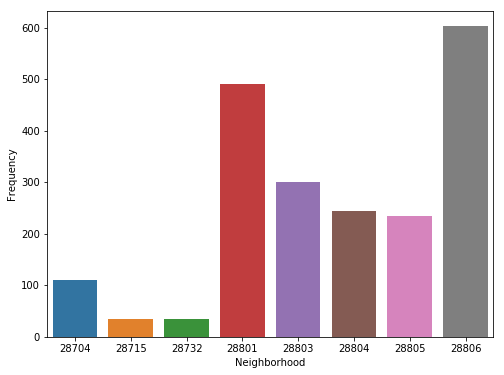

In [42]:
plt.figure(figsize(8,6))
sns.barplot(x=df.neighbourhood.value_counts().index, y=df.neighbourhood.value_counts().values, data=df, ci=None)
plt.xlabel('Neighborhood')
plt.ylabel('Frequency');

**We can see the 28806 has the highest number of rentals followed by 28801 neighborhood. On the other hand, 28715 and 28732 have very few rentals**

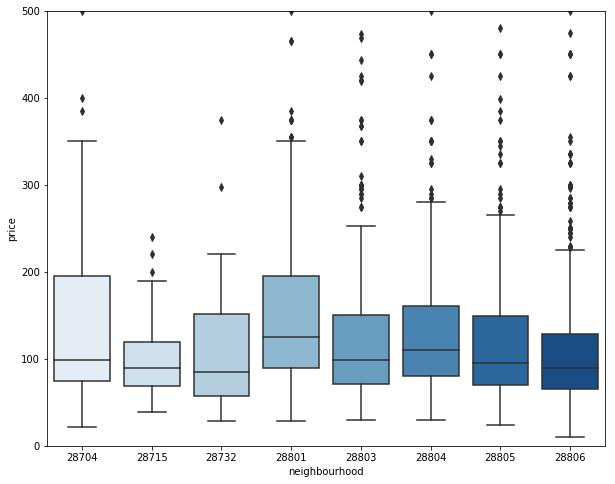

In [37]:
plt.figure(figsize(10,8))
sns.boxplot(x='neighbourhood', y='price', data=df, palette="Blues")
plt.ylim([0,500]);

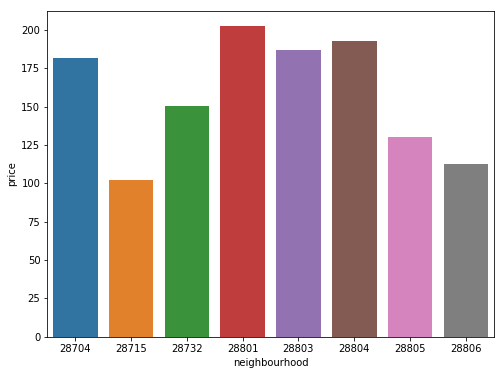

In [33]:
sns.barplot(y='price', x='neighbourhood', data=df, ci=None, estimator=np.mean);

**We can see a lot of variation in the rental price based on the neighborhood. 28801 is the leader followed pretty closely by 28804, 28803 and 28704**

**But even here we can look at the boxplots and say that there is actually less variation among the median rental prices at different neighborhoods**

e. Analyze and describe the distribution of the minimum number of nights for each stay. Then, segment your analysis according to room type. Does this segmentation provide any additional clarity on the requirements specified by hosts on the minimum number of nights for each stay? Please base your explanation on your results.

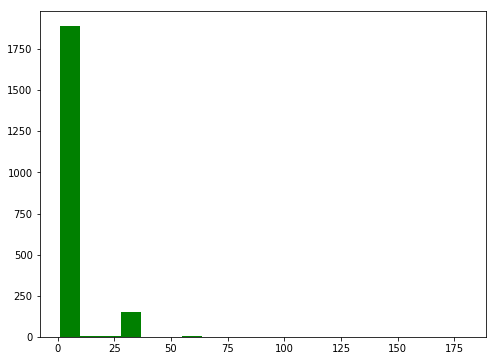

In [55]:
plt.figure(figsize(8,6))
plt.hist(df['minimum_nights'], bins=20, color='green');

**We can see that in most of the cases minimum number of nights is less than 5 although there are a few outliers. Like for a few of them it's more than 25 nights**

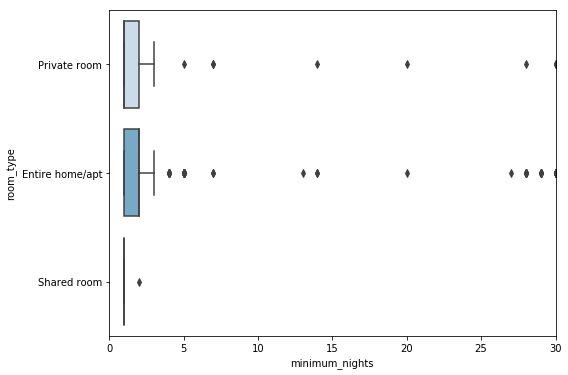

In [65]:
plt.figure(figsize(8,6))
sns.boxplot(x='minimum_nights', y='room_type', data=df, palette='Blues')
plt.xlim([0,30]);

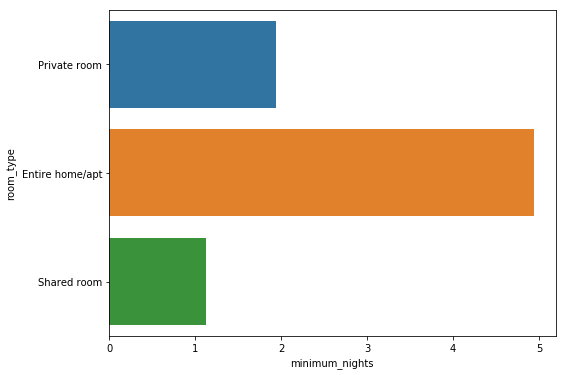

In [59]:
plt.figure(figsize(8,6))
sns.barplot(x='minimum_nights', y='room_type', data=df, ci=None, estimator=np.mean);

**From the above plots we can see that, the average minimum nights specified for Shared room is just 1 day while 2 for Private room and almost 5 nights for Entire Home/Apt. The mean for Entire Home/Apt is so high because it was afffected by many of the Homes/Apartments that had minimum nights specification as more than 25 nights or so**

f. Perform an analysis of listing strategies, focusing on the hosts with at least 5 listings in the data set. Specifically, select 3 such hosts and analyze the listings for each of these hosts (separately). Describe in detail what you believe their strategy to be in terms of the types of properties that they acquire and make available for Airbnb travelers.

In [27]:
df[df['calculated_host_listings_count'] >= 5].shape

(244, 15)

In [29]:
df[df['calculated_host_listings_count'] >= 5].head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,80905,French Industrial Chic Loft,427027,AshevilleStay,28801,35.59701,-82.55237,Entire home/apt,765,1,92,2018-12-02,1.01,12,361
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.57972,-82.59617,Entire home/apt,107,1,195,2019-02-10,2.12,7,339
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,28806,35.57755,-82.59697,Private room,71,1,51,2019-01-11,0.56,7,349
5,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,28806,35.57776,-82.59500,Shared room,26,1,213,2019-02-05,2.34,7,351
37,720609,World Eclectic-Heart of the City,427027,AshevilleStay,28801,35.59823,-82.55251,Entire home/apt,309,1,51,2018-10-23,0.66,12,361


In [77]:
df['host_name'][df['calculated_host_listings_count'] >= 5].unique().size

24

In [36]:
df['host_name'][df['calculated_host_listings_count'] >= 5].unique()

array(['AshevilleStay', 'BonPaul', 'John', 'Marc & Fay',
       'Model Communities', 'Melissa', 'Tiff', 'Darlene And Ron',
       'Marshall And Tracie', 'Shawn', 'Jonathan', 'Narendra', 'Ric',
       'Steve', 'Evolve Vacation Rental', 'Judy', 'The Lion And The Rose',
       'TurnKey Vacation Rentals', 'Mike', 'Bobby And Amanda',
       'Red Awning', 'David', 'Carolina Mornings', 'Towns'], dtype=object)

### 1) AshevilleStay

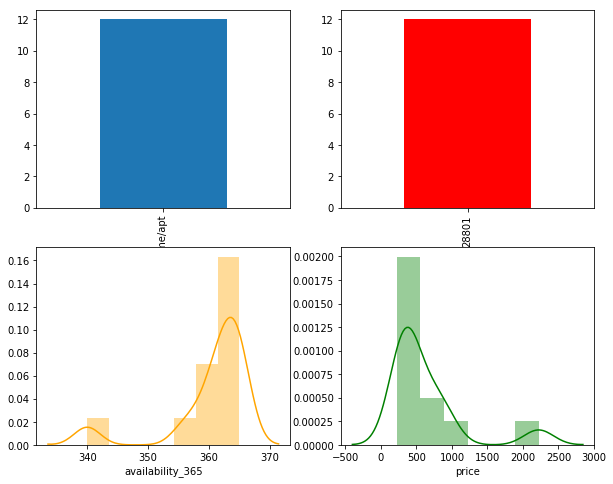

In [97]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
df['room_type'][df['host_name']=='AshevilleStay'].value_counts().plot(kind='bar')
plt.subplot(2,2,2)
df['neighbourhood'][df['host_name']=='AshevilleStay'].value_counts().plot(kind='bar', color='red')
plt.subplot(2,2,3)
sns.distplot(df['availability_365'][df['host_name']=='AshevilleStay'], kde=True, hist=True, color='orange')
plt.subplot(2,2,4)
sns.distplot(df['price'][df['host_name']=='AshevilleStay'], kde=True, hist=True, color='green');

**AshevilleStay has tried to concentrate it's business by having properties of same type (Entire Home/Apt) and they also confined their rentals to one neighborhood**

**Their target price range per night was more on the lower front (less than $200) but they do have some expensive rentals as well. They made sure the availability for all their properties is 340 days or more**

### 2) Narendra

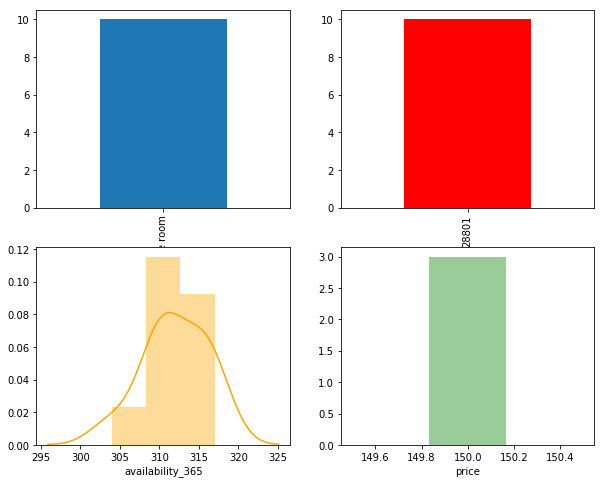

In [100]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
df['room_type'][df['host_name']=='Narendra'].value_counts().plot(kind='bar')
plt.subplot(2,2,2)
df['neighbourhood'][df['host_name']=='Narendra'].value_counts().plot(kind='bar', color='red')
plt.subplot(2,2,3)
sns.distplot(df['availability_365'][df['host_name']=='Narendra'], kde=True, hist=True, color='orange')
plt.subplot(2,2,4)
sns.distplot(df['price'][df['host_name']=='Narendra'], kde=True, hist=True, color='green');

**Narendra has tried to concentrate it's business by having only Private rooms and they also confined their rentals to one neighborhood**

**Their target price range per night was stable on $150. They made sure the availability for all their properties is 300 days or more**

### 3) Towns

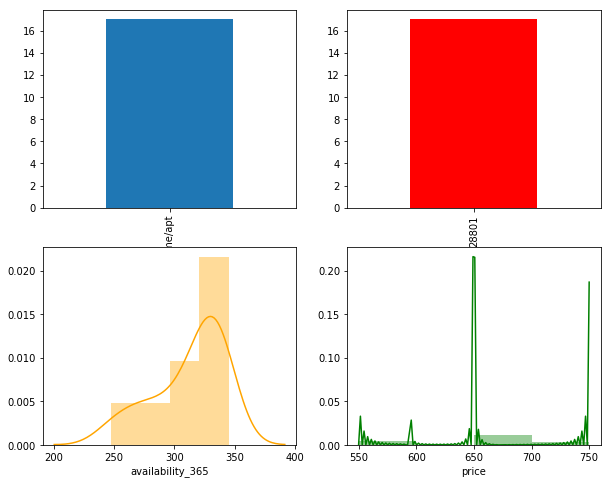

In [101]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
df['room_type'][df['host_name']=='Towns'].value_counts().plot(kind='bar')
plt.subplot(2,2,2)
df['neighbourhood'][df['host_name']=='Towns'].value_counts().plot(kind='bar', color='red')
plt.subplot(2,2,3)
sns.distplot(df['availability_365'][df['host_name']=='Towns'], kde=True, hist=True, color='orange')
plt.subplot(2,2,4)
sns.distplot(df['price'][df['host_name']=='Towns'], kde=True, hist=True, color='green');

**Towns (similar to AshevilleStay) has tried to concentrate it's business by having properties of same type (Entire Home/Apt) and they also confined their rentals to one neighborhood**

**They have their prices ranging from $(550-750) per night. They made sure the availability for all their properties is 250 days or more**